This problem would be best suited for a Supervised learning approach because it is using data to predict an outcome

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [57]:
from matplotlib import rcParams 
rcParams['figure.figsize'] = 15, 5 
sns.set_style('darkgrid')
pd.options.display.float_format = "{:,.4f}".format

In [91]:
customers = pd.read_csv('data_h3_3337.csv') 
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
customers.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [61]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0000,200.0000,200.0000,200.0000
mean,100.5000,38.8500,60.5600,50.2000
std,57.8792,13.9690,26.2647,25.8235
min,1.0000,18.0000,15.0000,1.0000
25%,50.7500,28.7500,41.5000,34.7500
50%,100.5000,36.0000,61.5000,50.0000
75%,150.2500,49.0000,78.0000,73.0000
max,200.0000,70.0000,137.0000,99.0000


There are 200 total entries in the data.<br>
There are no missing or null values.<br>
There are 200 unique customer IDs, 2 gender values, 51 age values, 64 income values, and 84 spending values.

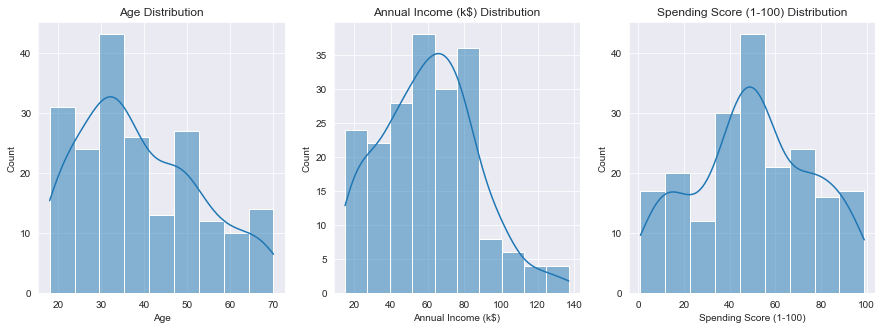

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.histplot(data=customers, x="Age", kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(data=customers, x="Annual Income (k$)", kde=True, ax=axes[1])
axes[1].set_title('Annual Income (k$) Distribution')

sns.histplot(data=customers, x="Spending Score (1-100)", kde=True, ax=axes[2])
axes[2].set_title('Spending Score (1-100) Distribution')

plt.show()

From these plots we can see that age is centered around 30 with a near linear decrease up to 70. Annual income is centered around 60-70 with a steep dropoff above 80. And spending score is centered around 50 with a relatively normal distribution.

([<matplotlib.patches.Wedge at 0x13560895850>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

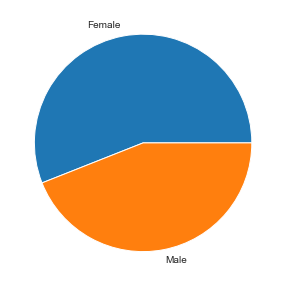

In [63]:
data = [customers['Gender'].tolist().count('Female'), customers['Gender'].tolist().count('Male')]
plt.pie(data, labels=['Female', 'Male'])

We can see that there are more women than men but it is sill a pretty even split

<AxesSubplot:>

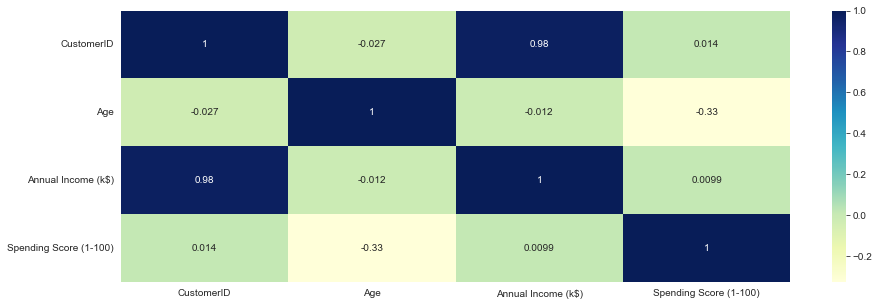

In [64]:
sns.heatmap(customers.drop(axis=1, columns='Gender').corr(), annot=True, cmap="YlGnBu")

Customer ID is highly correlated to annual income, suggesting that the data might be ordered by income. Aside from this there is no significant multicollinearity

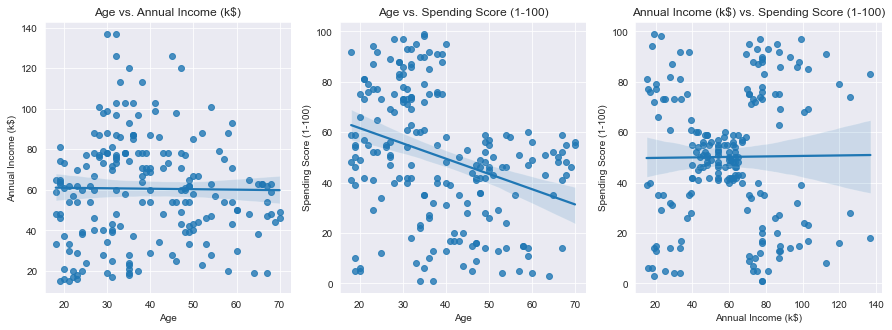

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.regplot(data=customers, x="Age", y="Annual Income (k$)", ax=axes[0])
axes[0].set_title('Age vs. Annual Income (k$)')

sns.regplot(data=customers, x="Age", y="Spending Score (1-100)", ax=axes[1])
axes[1].set_title('Age vs. Spending Score (1-100)')

sns.regplot(data=customers, x="Annual Income (k$)", y="Spending Score (1-100)", ax=axes[2])
axes[2].set_title('Annual Income (k$) vs. Spending Score (1-100)')

plt.show()

There is no significant correlation between age and annual income. There is a slight negative correlation between age and spending score. And there is no correlation between annual income and spending score.

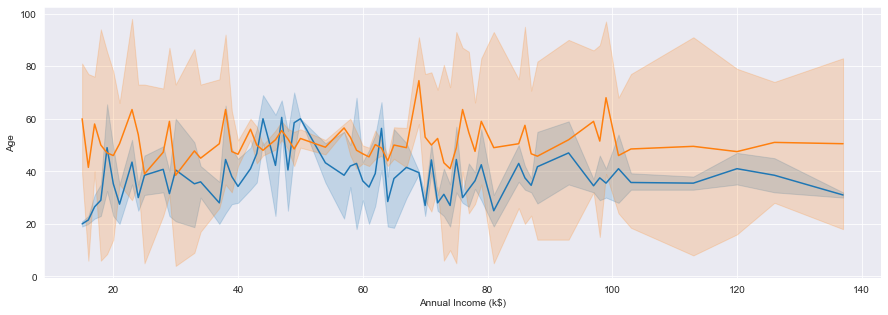

In [66]:
sns.lineplot(data=customers, x='Annual Income (k$)', y='Age')
sns.lineplot(data=customers, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

Both of these charts are relatively flat however there is a large amount of variability for incomes <40 and >70 suggesting not enough entries

In [93]:
# Saving only Spending_Score and income values into X.
X = customers.iloc[:, [2, 3]].values

In [94]:
customers.drop(columns=['Gender', 'CustomerID', 'Age'], inplace=True)

## Step 3 - K means
---

C:\Users\bryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


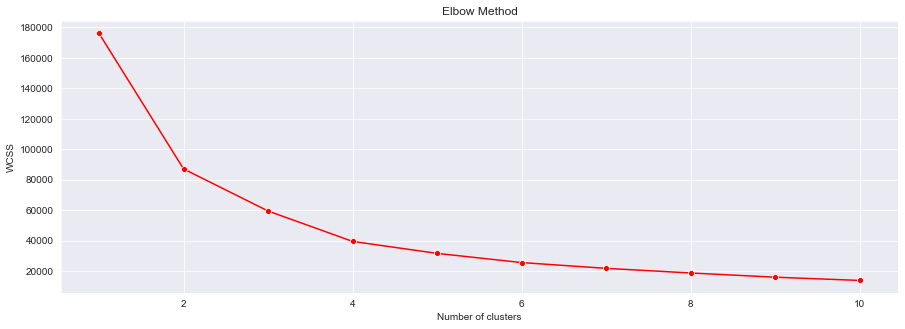

In [95]:
from sklearn.cluster import KMeans

# where we'll store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    # random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

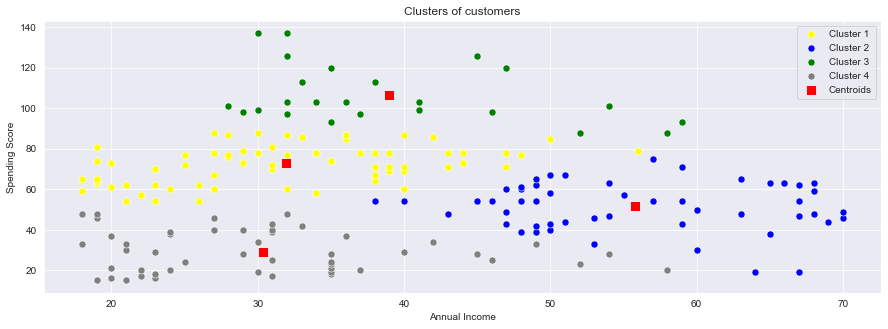

In [99]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Step 4 (Hierarchical Clustering)
---

In [102]:
from sklearn.preprocessing import StandardScaler, normalize 
 
scaler = StandardScaler()  
scaled_df = scaler.fit_transform(customers)  
   
normalized_df = normalize(scaled_df)  
 
# Converting the scaled data back into a pandas DataFrame  
normalized_df = pd.DataFrame(data=normalized_df)

In [103]:
from sklearn.decomposition import PCA 
 
pca = PCA(n_components = 2)  
X_principal = pca.fit_transform(normalized_df)  
X_principal = pd.DataFrame(X_principal)  
X_principal.columns = ['P1', 'P2']  
   
X_principal.head()

,P1,P2
0,-0.3636,-0.8361
1,-0.9149,-0.2261
2,0.1693,-0.9110
3,-0.8972,-0.2764
4,-0.3738,-0.8315


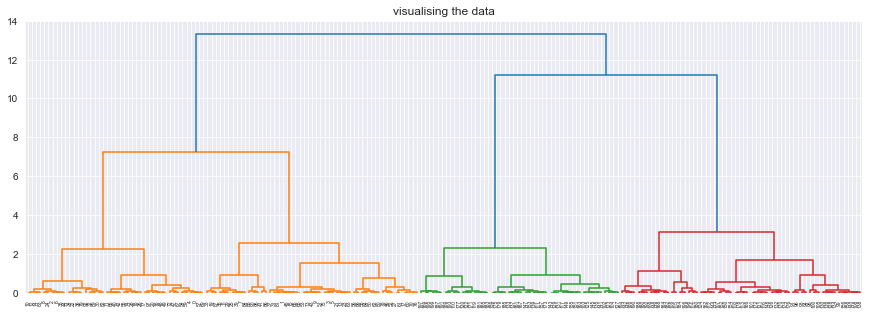

In [104]:
import scipy.cluster.hierarchy as shc 
 
plt.title('visualising the data')  
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

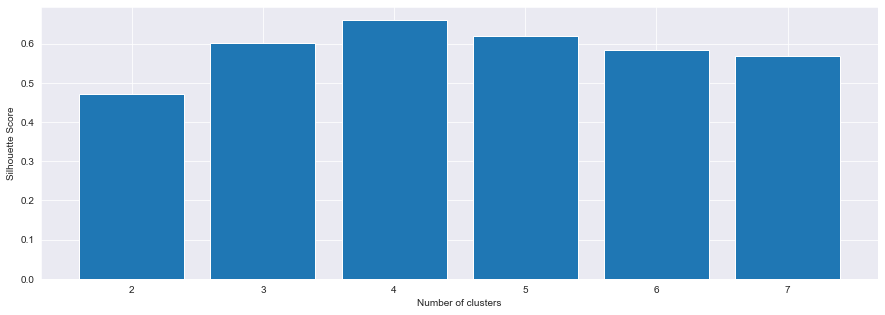

In [105]:
from sklearn.cluster import AgglomerativeClustering  
from sklearn.metrics import silhouette_score 
 
# where we'll save scores for later plotting 
silhouette_scores = []  
 
# testing different cluster values in range [2,8﴿ 
for n_cluster in range(2, 8): 
    silhouette_scores.append(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))
     
# Creating bar graph to compare the results. You can use a line plot if you prefer ﴾similar to K Means lab﴿ 
plt.bar(x=range(2, 8), height=silhouette_scores)  
plt.xlabel('Number of clusters')  
plt.ylabel('Silhouette Score')  
plt.show() 

In [106]:
# creating and fitting model 
agg = AgglomerativeClustering(n_clusters=4) 
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=4)

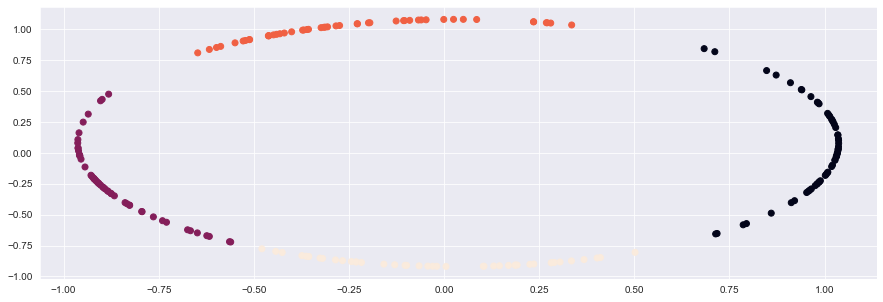

In [109]:
# Visualizing the clustering  
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = AgglomerativeClustering(n_clusters = 4).fit_predict(X_principal))  
plt.show() 

K means clustering requires that you find the correct value of k to form the model whereas hiearchical clustering finds the optimal value or values for you. K means was also more simple in implementation and less computationally expensive which could be an important factor when on a dataset of only 200 the hiearchy took several seconds to generate. Another factor to consider is that k means uses a random state meaning that the result can change even when performing the same operation, Hierarchical clustering is deterministic on a data set. Finally the Hierarchical clustering ended up with a strange scatter plot that I believe is due to the scaling of the data or the PCA eigenvalues.

I would use k means on larger data sets or sets that don't require perfect precision every time. Hierarchical I would use on smaller set or those that need to be exactly deterministic